In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp  # Symbolic computation for gradients (bonus)
from matplotlib import animation

In [2]:
# 1. Test Functions
# Rastrigin Function
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])

# Ackley Function
def ackley(x):
    x = np.array(x)
    a, b, c = 20, 0.2, 2 * np.pi
    d = len(x)
    sum1 = np.sum(x ** 2)
    sum2 = np.sum(np.cos(c * x))
    return -a * np.exp(-b * np.sqrt(sum1 / d)) - np.exp(sum2 / d) + a + np.e

In [3]:
# 2. Gradient Descent Implementation
def gradient_descent(func, grad_func, x0, learning_rate=0.01, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    for i in range(max_iter):
        grad = np.array(grad_func(x))
        x -= learning_rate * grad
        history.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return x, history

In [4]:
# 3. Visualization Functions
def plot_function(func, x_range, y_range, title="Function Plot"):
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.array([[func([x, y]) for x in x_range] for y in y_range])
    plt.figure(figsize=(10, 6))
    plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.colorbar()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [5]:
# 4. Gradient Computation Methods
# Numerical Gradient
def numerical_gradient(func, x, epsilon=1e-5):
    grad = np.zeros_like(x, dtype=float)
    for i in range(len(x)):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += epsilon
        x_minus[i] -= epsilon
        grad[i] = (func(x_plus) - func(x_minus)) / (2 * epsilon)
    return grad

In [6]:
# 5. Momentum-Based Gradient Descent
def momentum_gradient_descent(func, grad_func, x0, learning_rate=0.01, momentum=0.9, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)
    v = np.zeros_like(x)
    history = [x.copy()]
    for i in range(max_iter):
        grad = np.array(grad_func(x))
        v = momentum * v - learning_rate * grad
        x += v
        history.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return x, history

In [7]:
# 6. Adaptive Learning Rate (Adagrad)
def adagrad(func, grad_func, x0, learning_rate=0.01, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)
    G = np.zeros_like(x)
    history = [x.copy()]
    epsilon = 1e-8
    for i in range(max_iter):
        grad = np.array(grad_func(x))
        G += grad ** 2
        adjusted_lr = learning_rate / (np.sqrt(G) + epsilon)
        x -= adjusted_lr * grad
        history.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return x, history

In [8]:
# 7. Testing Pipeline
def test_optimization(func, grad_func, x0, method, method_name, **kwargs):
    # Run optimization
    x_opt, history = method(func, grad_func, x0, **kwargs)

    # Plot function and optimization trajectory
    x_range = np.linspace(-5, 5, 100)
    y_range = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.array([[func([x, y]) for x in x_range] for y in y_range])

    plt.figure(figsize=(10, 6))
    plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.colorbar()
    plt.title(f"{method_name} Optimization Trajectory")
    plt.xlabel("x")
    plt.ylabel("y")

    history = np.array(history)
    plt.plot(history[:, 0], history[:, 1], 'r.-', label="Trajectory")
    plt.scatter([x_opt[0]], [x_opt[1]], color='white', label="Optimum")
    plt.legend()
    plt.show()

    print(f"Optimal Solution: {x_opt}")
    print(f"Function Value at Optimum: {func(x_opt)}")

Testing Rastrigin Function:


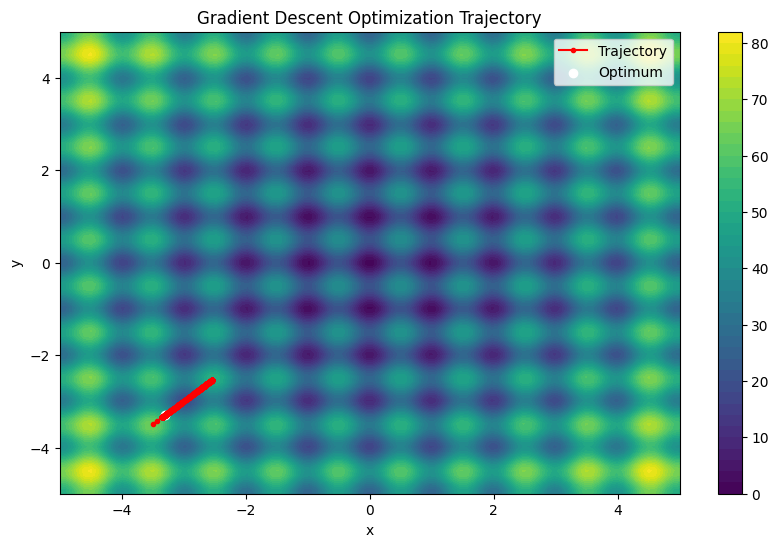

Optimal Solution: [-3.29744445 -3.29744445]
Function Value at Optimum: 47.62041402750188

Testing Ackley Function:


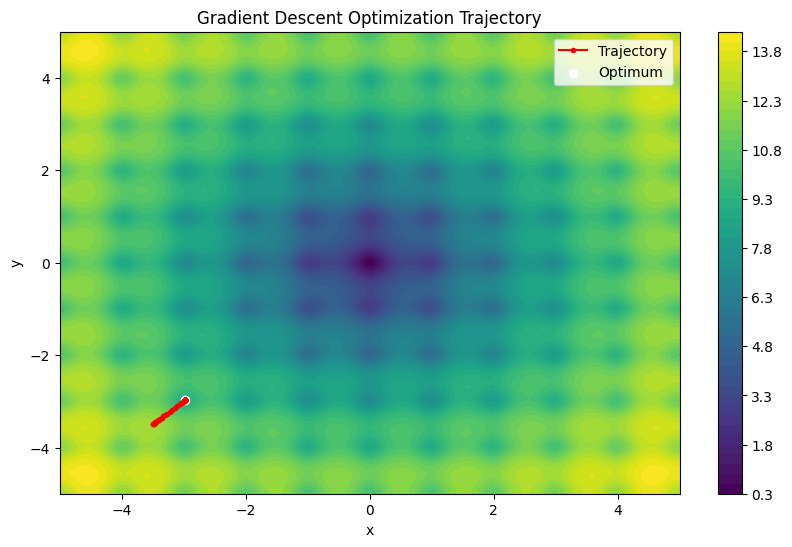

Optimal Solution: [-2.97580411 -2.97580411]
Function Value at Optimum: 9.001694892639804


In [16]:
# 8. Main Execution
if __name__ == "__main__":
    # Define gradients for Rastrigin and Ackley
    def grad_rastrigin(x):
        A = 10
        return [2 * xi + 2 * np.pi * A * np.sin(2 * np.pi * xi) for xi in x]

    def grad_ackley(x):
        x = np.array(x)
        a, b, c = 20, 0.2, 2 * np.pi
        d = len(x)
        grad1 = (b / d) * x / np.sqrt(np.sum(x ** 2))
        grad2 = (c / d) * np.sin(c * x)
        return a * np.exp(-b * np.sqrt(np.sum(x ** 2) / d)) * grad1 + np.exp(np.cos(c * x) / d) * grad2

    # Initial Point
    x0 = [-3.5, -3.5]

    # Test Rastrigin Function
    print("Testing Rastrigin Function:")
    test_optimization(rastrigin, grad_rastrigin, x0, gradient_descent, "Gradient Descent")

    # Test Ackley Function
    print("\nTesting Ackley Function:")
    test_optimization(ackley, grad_ackley, x0, gradient_descent, "Gradient Descent")

Testing Rastrigin Function:


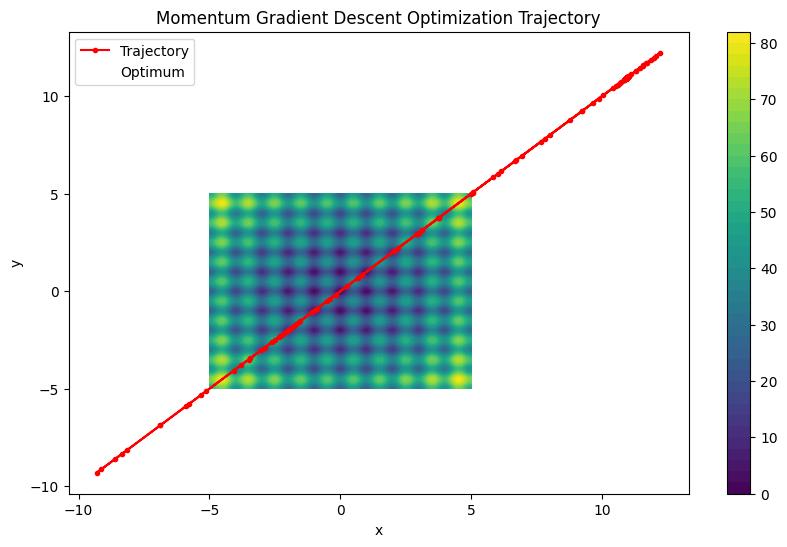

Optimal Solution: [10.94337301 10.94337301]
Function Value at Optimum: 240.76744851338933

Testing Ackley Function:


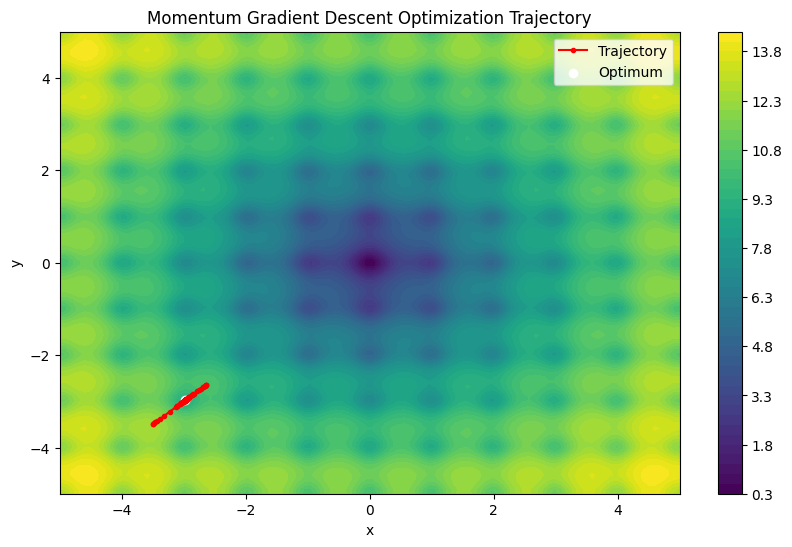

Optimal Solution: [-2.97580504 -2.97580504]
Function Value at Optimum: 9.001694568392878


In [17]:
# 8. Main Execution
if __name__ == "__main__":
    # Define gradients for Rastrigin and Ackley
    def grad_rastrigin(x):
        A = 10
        return [2 * xi + 2 * np.pi * A * np.sin(2 * np.pi * xi) for xi in x]

    def grad_ackley(x):
        x = np.array(x)
        a, b, c = 20, 0.2, 2 * np.pi
        d = len(x)
        grad1 = (b / d) * x / np.sqrt(np.sum(x ** 2))
        grad2 = (c / d) * np.sin(c * x)
        return a * np.exp(-b * np.sqrt(np.sum(x ** 2) / d)) * grad1 + np.exp(np.cos(c * x) / d) * grad2

    # Initial Point
    x0 = [-3.5, -3.5]

    # Test Rastrigin Function
    print("Testing Rastrigin Function:")
    test_optimization(rastrigin, grad_rastrigin, x0, momentum_gradient_descent, "Momentum Gradient Descent")

    # Test Ackley Function
    print("\nTesting Ackley Function:")
    test_optimization(ackley, grad_ackley, x0, momentum_gradient_descent, "Momentum Gradient Descent")

Testing Rastrigin Function:


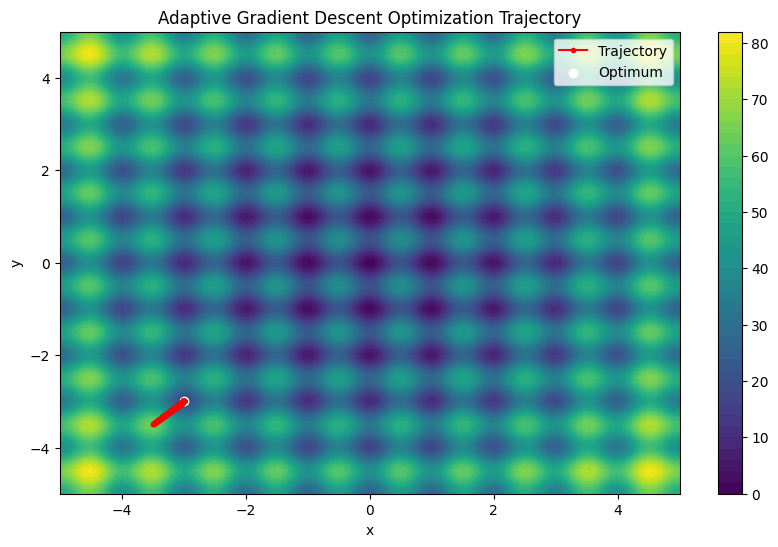

Optimal Solution: [-2.99610275 -2.99610275]
Function Value at Optimum: 17.959259271875855

Testing Ackley Function:


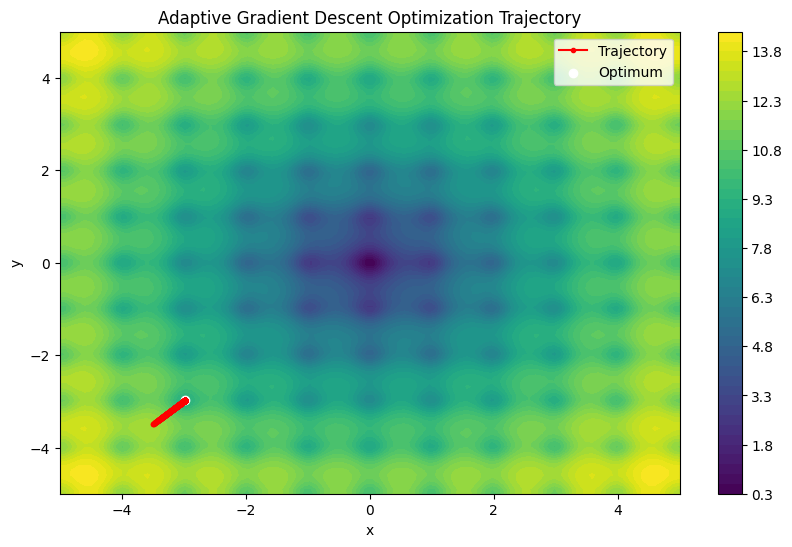

Optimal Solution: [-2.9804261 -2.9804261]
Function Value at Optimum: 9.00116818689028


In [18]:
# 8. Main Execution
if __name__ == "__main__":
    # Define gradients for Rastrigin and Ackley
    def grad_rastrigin(x):
        A = 10
        return [2 * xi + 2 * np.pi * A * np.sin(2 * np.pi * xi) for xi in x]

    def grad_ackley(x):
        x = np.array(x)
        a, b, c = 20, 0.2, 2 * np.pi
        d = len(x)
        grad1 = (b / d) * x / np.sqrt(np.sum(x ** 2))
        grad2 = (c / d) * np.sin(c * x)
        return a * np.exp(-b * np.sqrt(np.sum(x ** 2) / d)) * grad1 + np.exp(np.cos(c * x) / d) * grad2

    # Initial Point
    x0 = [-3.5, -3.5]

    # Test Rastrigin Function
    print("Testing Rastrigin Function:")
    test_optimization(rastrigin, grad_rastrigin, x0, adagrad, "Adaptive Gradient Descent")

    # Test Ackley Function
    print("\nTesting Ackley Function:")
    test_optimization(ackley, grad_ackley, x0, adagrad, "Adaptive Gradient Descent")